# Importing data file and extracting all the URLS form th file.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import re
with open('/content/drive/My Drive/Colab Notebooks/nytimes.txt','r') as file:
    for line in file:
        urls=re.findall('(https?://\S+)', line)

        with open('/content/drive/My Drive/Colab Notebooks/urls.txt','a') as fw:
            for item in urls:
                fw.writelines('%s\n' % item)

# Getting Category names using Regular Expression

In [3]:
import re
with open('/content/drive/My Drive/Colab Notebooks/urls.txt', 'r') as f: 
    for line in f:
      obj2 = re.findall('://[\w\-\.]+/[0-9]+/[0-9]+/[0-9]+/([\w\-]+)',  
                  line) 
      with open('/content/drive/My Drive/Colab Notebooks/outcategoryname.txt','a') as filess:
        for item in obj2:
          filess.writelines('%s\n' % item)

# Starting Spark Session

In [4]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q !wget -q http://apache.osuosl.org/spark/spark-3.0.2/spark-3.0.2-bin-hadoop3.2.tgz
!tar xf spark-3.0.2-bin-hadoop3.2.tgz
!pip install -q findspark

In [5]:
!pip install -U pyarrow

     |████████████████████████████████| 20.7MB 1.6MB/s 
  Found existing installation: pyarrow 0.14.1
    Uninstalling pyarrow-0.14.1:
      Successfully uninstalled pyarrow-0.14.1


In [6]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.2-bin-hadoop3.2"

In [7]:
import findspark
findspark.init()
from pyspark import SparkContext, SparkConf
from pyspark.sql import SQLContext, SparkSession

In [8]:
if __name__ == "__main__":
	
	# create Spark context with necessary configuration
	sc = SparkContext("local","PySpark Word Count Exmaple")

# Word Count for the top 5 News category

In [9]:
  # read data from text file and split each line into words
words = sc.textFile('/content/drive/My Drive/Colab Notebooks/outcategoryname.txt').flatMap(lambda line: line.split(" "))
wordCounts= words.map(lambda word: (word, 1)).reduceByKey(lambda a,b:a +b)

In [10]:
wordCounts = wordCounts.map(lambda x:(x[1],x[0]))

In [11]:
wordCounts=wordCounts.sortByKey(False)

In [12]:
wordCounts = wordCounts.map(lambda x:(x[1],x[0]))

In [13]:
wordCounts.take(5)

[('sports', 1268),
 ('world', 1211),
 ('us', 1199),
 ('business', 1041),
 ('nyregion', 663)]

In [14]:
xy=wordCounts.take(5)

In [15]:
z=list()
m=list()
for x in xy:
  z.append(x[1])
  m.append(x[0])

In [16]:
check=[]
for i in m:
  category='/'+i+'/'
  check.append(category)


# Spliting the entire nytimes file at URL

In [17]:
noe = list()
with open('/content/drive/My Drive/Colab Notebooks/nytimes.txt', 'r') as f: 
    x=f.read()
x=x.lower()
noe=x.split('url:')

# Adding articles of top 5 news category

In [18]:
for words in noe:
  for ls in check:
    if re.search(ls, words):
      with open('/content/drive/My Drive/Colab Notebooks/out_with_topfive_category1.txt','a') as filess:
          filess.write(words)
    else:
      pass

# Removing punctutions

In [19]:
with open('/content/drive/My Drive/Colab Notebooks/out_with_topfive_category1.txt', 'r') as f: 
    x=f.read()
x=x.lower()

import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer


tokenizer = RegexpTokenizer(r'\w+')
y=tokenizer.tokenize(x)
filtered_sentence = (" ").join(y)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [20]:
file1 = open('/content/drive/My Drive/Colab Notebooks/out_with_topfive_category.txt', 'w+') 
file1.write(filtered_sentence)
file1.close()

# Performing word count on articles of top 5 news category

In [21]:
from pyspark.ml.feature import StopWordsRemover

# Define a list of stop words or use default list
remover = StopWordsRemover()
stop_words = remover.getStopWords() 
  # read data from text file and split each line into words
words = sc.textFile('/content/drive/My Drive/Colab Notebooks/out_with_topfive_category.txt').flatMap(lambda line: line.split(" "))
# Convert the words in lower case and remove stop words from stop_words
splitRDD_no_stop = words.filter(lambda x: x.lower() not in stop_words)

# Create a tuple of the word and 1 
splitRDD_no_stop_words = splitRDD_no_stop.map(lambda w: (w, 1))

# Count of the number of occurences of each word 
wordCounts = splitRDD_no_stop_words.reduceByKey(lambda x, y: x + y)
#wordCounts= words.map(lambda word: (word, 1)).reduceByKey(lambda a,b:a +b)

In [22]:
wordCounts = wordCounts.map(lambda x:(x[1],x[0]))

In [23]:
wordCounts=wordCounts.sortByKey(False)

In [24]:
wordCounts = wordCounts.map(lambda x:(x[1],x[0]))

In [26]:
wordCounts.take(100)

[('said', 42169),
 ('mr', 33638),
 ('one', 11421),
 ('new', 9213),
 ('two', 8854),
 ('year', 8750),
 ('people', 7936),
 ('last', 7769),
 ('also', 7646),
 ('first', 7549),
 ('trump', 7088),
 ('like', 6752),
 ('time', 6520),
 ('state', 6351),
 ('years', 6328),
 ('2016', 5876),
 ('ms', 5784),
 ('com', 5568),
 ('nytimes', 5421),
 ('www', 5387),
 ('html', 5385),
 ('http', 5383),
 ('united', 5029),
 ('states', 5016),
 ('many', 4996),
 ('world', 4869),
 ('game', 4805),
 ('city', 4789),
 ('percent', 4769),
 ('1', 4653),
 ('three', 4634),
 ('even', 4620),
 ('government', 4396),
 ('company', 4335),
 ('president', 4096),
 ('made', 4079),
 ('million', 3978),
 ('back', 3871),
 ('team', 3778),
 ('since', 3717),
 ('court', 3706),
 ('m', 3639),
 ('american', 3627),
 ('police', 3611),
 ('still', 3559),
 ('day', 3455),
 ('clinton', 3438),
 ('officials', 3427),
 ('may', 3410),
 ('get', 3361),
 ('york', 3341),
 ('party', 3309),
 ('make', 3304),
 ('2', 3275),
 ('country', 3228),
 ('much', 3226),
 ('re', 32

In [27]:
xy=wordCounts.take(100)

# Saving the word count for top 100 words from the articles of top 5 news category

In [28]:
zz=list()
gg=list()
for xx in xy:
  zz.append(xx[1])
  gg.append(xx[0])

hell=" "
noo=0
for yy in zz:
  for ll in range(yy):
    hell+=(str(gg[noo]))
    hell+=" "
  noo+=1

In [29]:
file1 = open('/content/drive/My Drive/Colab Notebooks/out_task2.txt', 'w+') 
file1.write(hell)
file1.close()

# Forming the word cloud

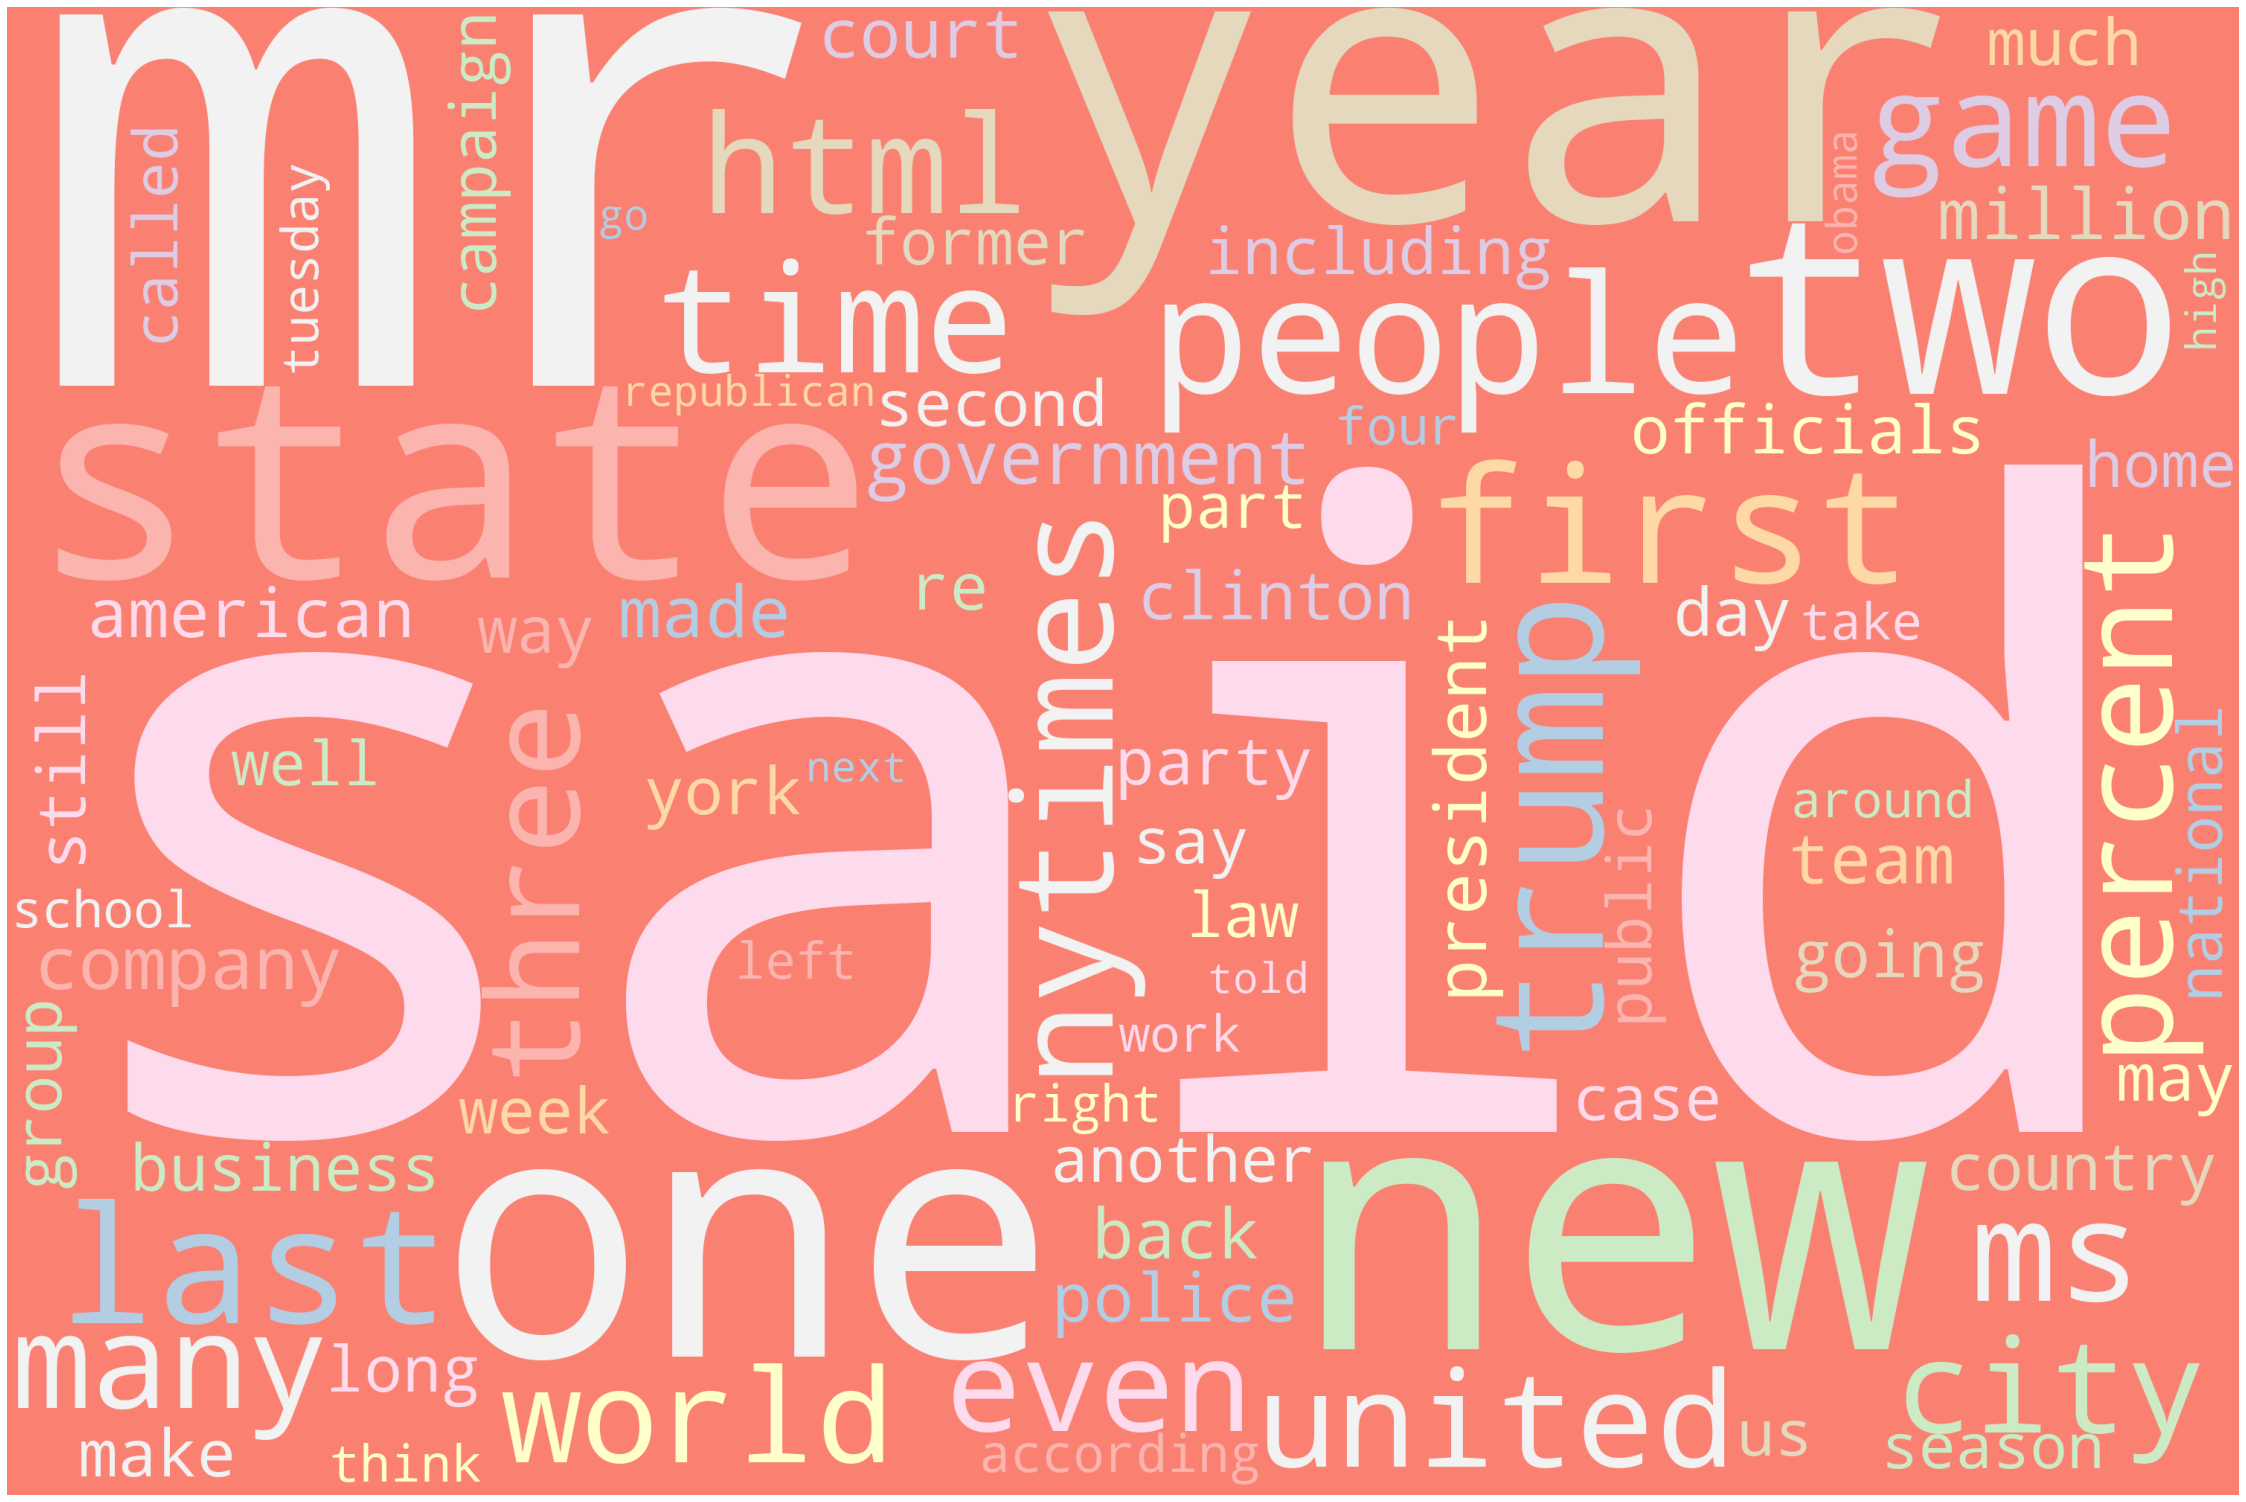

In [30]:
with open('/content/drive/My Drive/Colab Notebooks/out_task2.txt', 'r') as f: 
    x=f.read()
x=x.lower()

import matplotlib.pyplot as plt
%matplotlib inline
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");


from wordcloud import WordCloud, STOPWORDS
# Generate word cloud
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='salmon', colormap='Pastel1', collocations=False).generate(x)
wordcloud.to_file('/content/drive/My Drive/Colab Notebooks/task2_wordcloud.png')
# Plot
plot_cloud(wordcloud)